# About Dateset 

**The dataset contains information on bookings for two hotels in Portugal (a resort and a city hotel) scheduled to arrive in a period between July 1, 2015 and August 31, 2017 and for both hotels the same information was collected like, observations and hotel reservations,including those that were cancelled**

**Here there are some questions for analysis:****

1. What is the month with the most guest arrivals?
2. How long do guests tend to stay at the hotel?
3. How many reservations were made by repeated guests?
4. What is the Average Daily Rate (ADR) throughout the year?
5. How many reservations were cancelled out of total?
6. What is the most frequent deposit type for cancelled reservations?
7. Which countries do customers come from?
8. What types of customers are most common in each hotel?
9. What is their preferred meal plan?
10. Which hotel is preferred by adults with children?
11. What is the strongest market segment and distribution channel?

**Conclusion Questions :**

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotinal desions?


**Hypothesis**

 1. More cancellations occur when prices are higher
 2. When there is a longer waiting list, customers tend to cancel more frequently
 3. The majority of clients are coming from offline travel agents to make their reservations

![](http://)
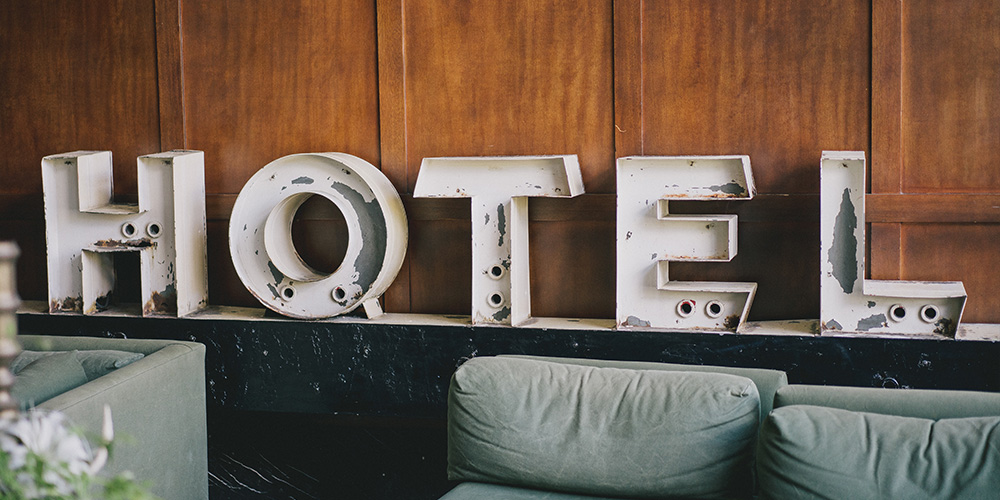



# Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan as NA
import datetime as dt 


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Dataset or Reading CSV file 

In [2]:
data = pd.read_csv('/kaggle/input/hotel-booking/hotel_booking.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Cleaning Data 

In [3]:
# Showing the first 10 rows 

data.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [4]:
#showing the bottom 10 row 

data.tail(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,Transient,140.75,0,1,Check-Out,2017-09-04,Wanda Jones,Wanda_J@yandex.com,379-374-7947,************8581
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,Transient,99.00,0,0,Check-Out,2017-09-05,Betty Taylor,BTaylor@yandex.com,114-632-1395,************1795
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,Transient,209.00,0,0,Check-Out,2017-09-05,Cesar Moreno,Cesar_M50@comcast.net,666-379-7260,************7835
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,Transient,87.60,0,0,Check-Out,2017-09-06,Jose Andersen,Andersen_Jose@protonmail.com,656-714-5930,************7923
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,Transient,96.14,0,2,Check-Out,2017-09-06,James Mccarty,James_M@att.com,689-204-7523,************7994
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
# show columns

data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
#showing Data type 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**As you see in the above, reservation_status_date column is an object and it should be datetime , later on will be fixed **

In [7]:
#Check dataframe

data.shape


(119390, 36)

**According to the above , our data frame is consisting of 119390 rows and 36 columns**

In [8]:
#check Duplicated data 

data.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

*** No duplicates data found **

In [9]:
#check if there're null values

data.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
data.drop(['company','agent'],axis = 1,inplace=True)
data.dropna(inplace=True)


In [11]:
data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Convert reservation_status_date to be date ISO object 

In [12]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

# Check Unique meal Plan for all reservations? 

In [13]:
data['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
# replacing Undefined to be SC instead 

data['meal'].replace(to_replace = 'Undefined',value='SC',inplace=True)


In [15]:
#showing unique meal plans

data['meal'].unique()


array(['BB', 'FB', 'HB', 'SC'], dtype=object)

# UNIQUE VALUES BY CATEGORICAL COLUMNS Check?


In [16]:
for col in data.describe(include= 'object').columns:
  print(col)
  print(data[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 

# Removing Personal information in data such as name , email, phone number, credit card 


In [17]:
data.drop(['name','email','phone-number','credit_card'],axis=1 , inplace = True)


In [18]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
data.shape

(118898, 30)

In [20]:
data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Analysis and exploration 


In [21]:
# we want to know the total adult
data['adults'].groupby(data['hotel']).sum()

hotel
City Hotel      146798
Resort Hotel     74161
Name: adults, dtype: int64

In [22]:
# we want to know the total child 
data['children'].groupby(data['hotel']).sum()

hotel
City Hotel      7248.0
Resort Hotel    5142.0
Name: children, dtype: float64

In [23]:
# we want to know the total babies 
data['babies'].groupby(data['hotel']).sum()

hotel
City Hotel      392
Resort Hotel    553
Name: babies, dtype: int64

# Data Prepation ( New columns added with sum calculation)

In [24]:
# Combining children and babies together as kids
data['kids'] = data['children']+ data['babies']


In [25]:
## Creating total_members column
data['total_members']= data['adults']+data['kids']


In [26]:
# Total nights per booking
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']


In [27]:
# Creating family column

data['family'] = np.where(data['kids'] > 0, '1', '0')


In [28]:
# Dataset with confirmed bookings only

confirmed_bookings = data[data['is_canceled'] == '0']

In [29]:
# Dataset with canceled bookings only

canceled_bookings = data[data['is_canceled'] == '1']

# new Columns have been added as following 

* Kids = total children+ total biabes 
* Total members = total adults+total kids
* Total Nights = stay in weeknights + saty in weekendnights
* family column = add a dataframe with conditon where kid >0 that's means booking family 
* confirmed booking = if booking is canceled = 0
* canceled booking = if booking is canceled = 1

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

# ADR = Average Daily Rate (ADR) throughout the year

In [31]:
# Calculate the mean of ADR 

data['adr'].mean()


102.00324252720817

In [32]:
data['is_canceled'].value_counts()

0    74745
1    44153
Name: is_canceled, dtype: int64

# Visulization and Findings


<Axes: >

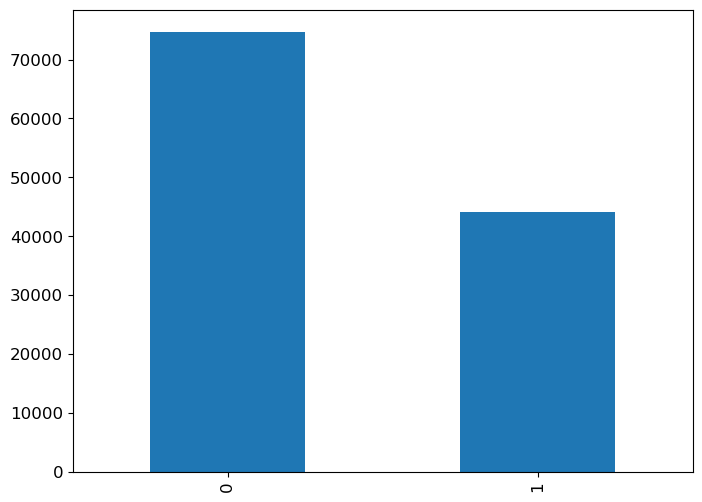

In [33]:
data['is_canceled'].value_counts().plot(kind='bar',fontsize=12,figsize=(8,6))


*** Reservation_ Statues as above bar chart ( Confirmed booking = 74745 , canceled booking = 44153   Total bookings = 118898) ** 

# The Bar Graph shows the % of reservations that are canceled and those that are alot in the specific period. It is obviosly that there are still a sighnificant number of reservations that have been not canceled. 37% from all bookings are canceled which impact on the hotel's earning 

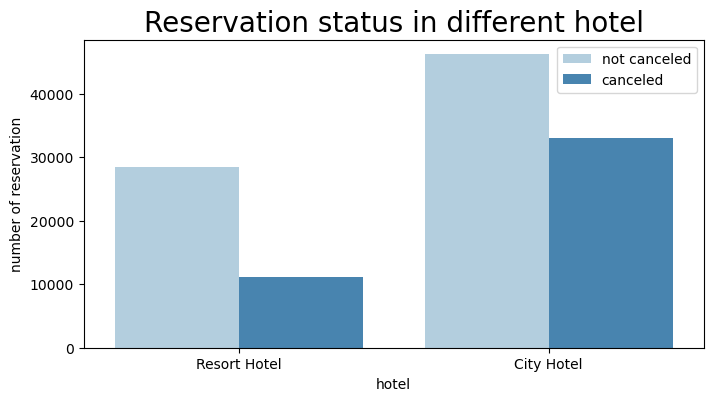

In [34]:
plt.figure(figsize= (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled',data = data, palette = 'Blues')
legend_labels,_= ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotel',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

# As above chart is showing us the total numbers of bookings in a city hotel than resort hotel which impact resort hotel more expensive than city hotel also, in comparion the cancellation in a city hotel compared a confirmed booking is high 

# How long do guests tend to stay at the hotel?

In [35]:
data['total_nights'].mean()


3.431041733250349

# Analysis Average Daily Rate in City Hotel and Resort Hotel 

In [36]:
resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [37]:
city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [38]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

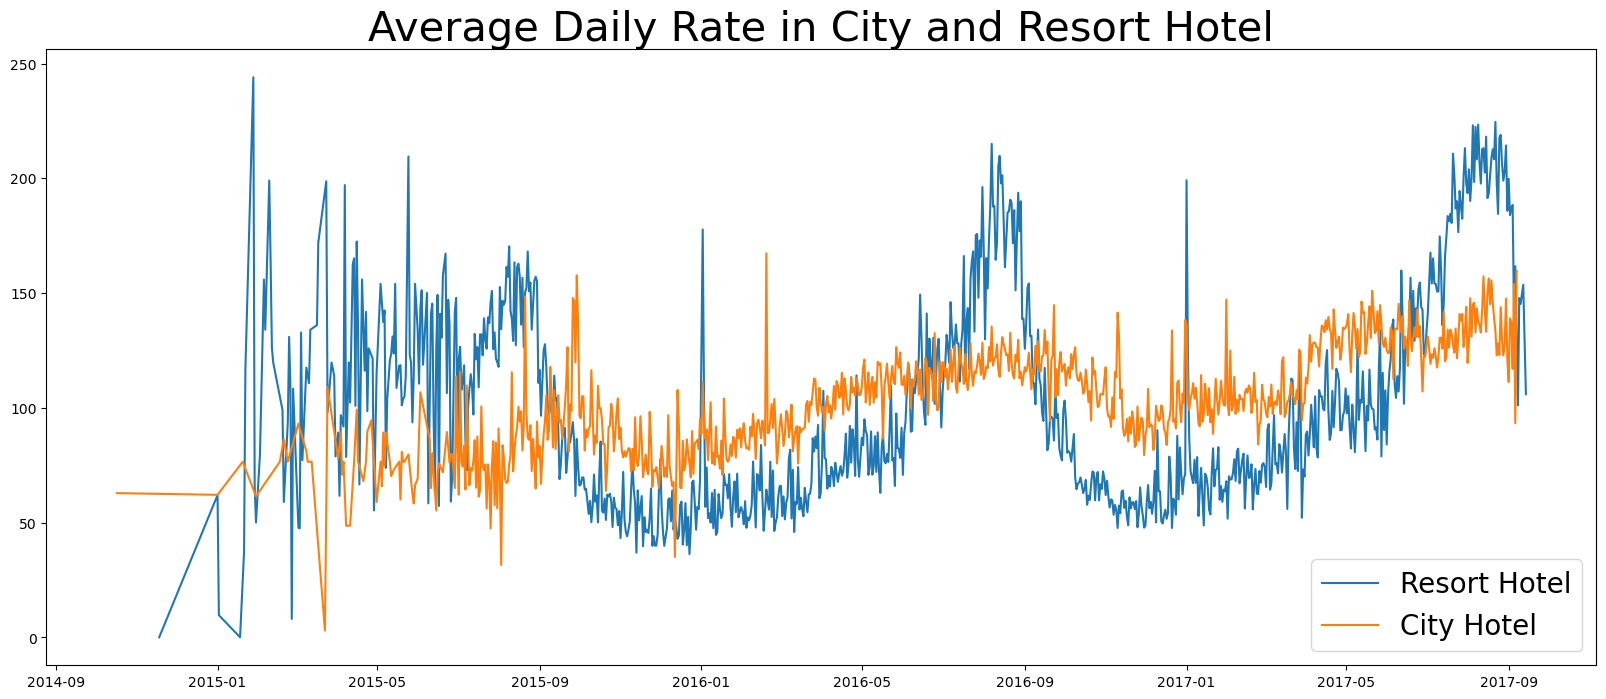

In [39]:
plt.figure(figsize= (20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label ='City Hotel')
plt.legend(fontsize = 20)
plt.show()

# The above line chart shows that, the city hotel "ADR" is less than resort hotel for most of days and on other days, it is even lessv

# Which countries do customers come from?

In [40]:
country_visitors = data[data['is_canceled'] == '0'].groupby(['country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = "dense",
                    projection = 'orthographic',
                    title="Nationality of visitors"
             )

# Most of customers came from europe and it's make sense hotels in spain and portugal 

# What is the most frequent deposit type for cancelled reservations?

In [41]:
data['deposit_type'].describe()

count         118898
unique             3
top       No Deposit
freq          104163
Name: deposit_type, dtype: object

In [42]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [43]:
data['deposit_type'].groupby(data['is_canceled']).value_counts()

is_canceled  deposit_type
0            No Deposit      74526
             Refundable        126
             Non Refund         93
1            No Deposit      29637
             Non Refund      14480
             Refundable         36
Name: deposit_type, dtype: int64

# Acording to the above-mentioned analysis , the most frequent deposit type for cancelled reservations is "No Deposit" by 29637 reservations which impact the sequre of booking is totaly high for no deposit. We recommend change the deposit type for cancelation bookings to be only refundable 

# What types of customers are most common in each hotel?

<Axes: >

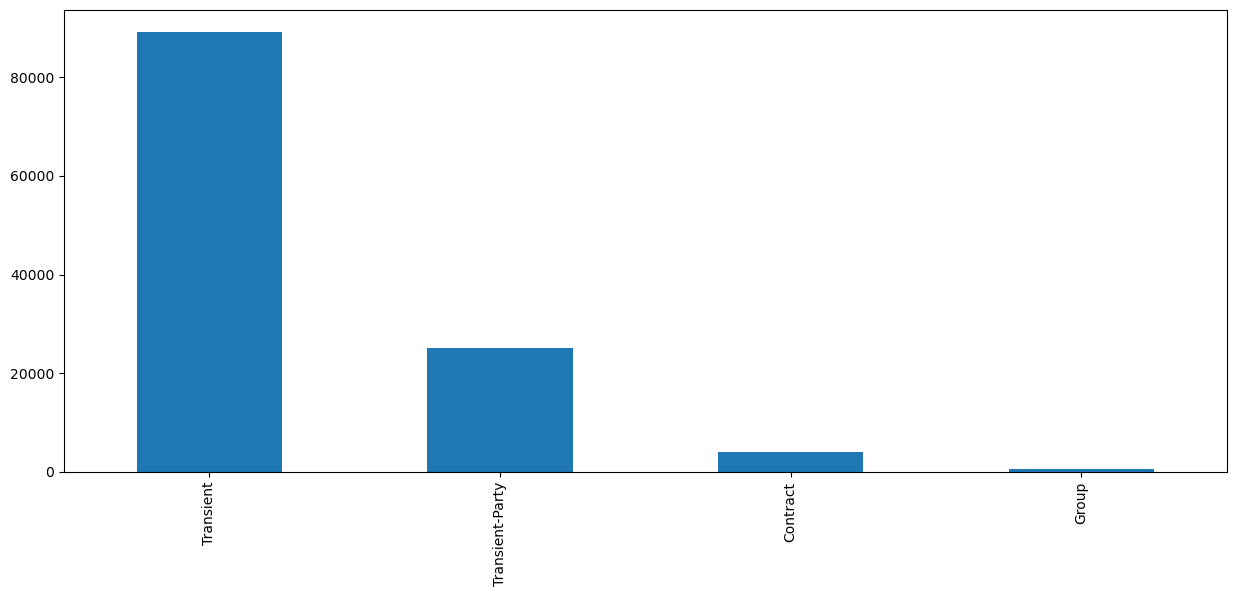

In [44]:
data['customer_type'].value_counts().plot(kind='bar',figsize=(15,6))

# The Bar chart shows us the customer type transient is the highest ,Transient-party, contract and group so, The majority of customers are transients.

# The Top 10 country with reservation canceled 

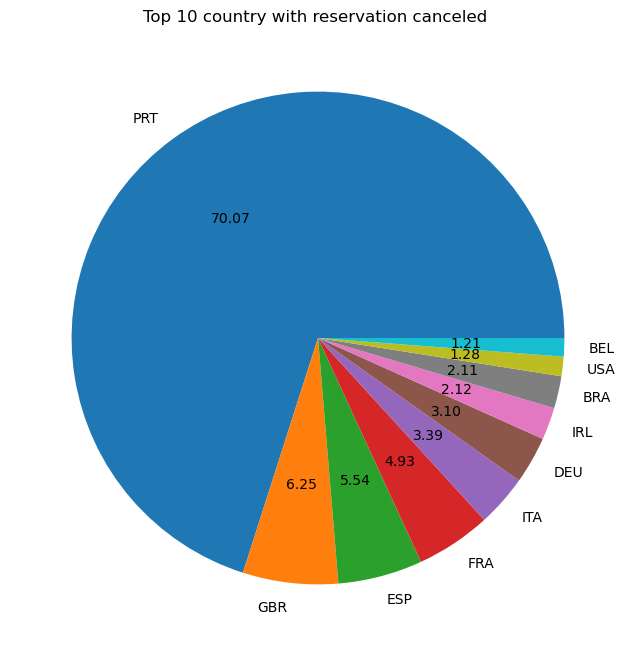

In [45]:
cancelled_data = data[data['is_canceled']== 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (10, 8))
plt.title('Top 10 country with reservation canceled ')
plt.pie(top_10_country, autopct = '%.2f' , labels = top_10_country.index)
plt.show()

# Pie chart on the above shows us portugal is the highest country in canceling reservations 

# Let's check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline TravelAgents? 


In [46]:
data['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [47]:
data['market_segment'].value_counts(normalize=True)


Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

# Around 46% of the clients come from online travel agencies,whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.

# What is their preferred meal plan?

In [48]:
data['meal'].describe()

count     118898
unique         4
top           BB
freq       91863
Name: meal, dtype: object

# Refering to the above analysis BB is the prefered meal plan and it's repeated by 91863 times 

# Suggestions 

* In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts the consumers.
* As the ratio of the cancelation is high depend on the despoite type so, we suggest to change the policy for bookings 
* In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancelation i the highest in this month
*  They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.
*  They can charge minimum amount of booking cancellacancellation
* Also hotels can provide a coupons for previous customer to discount on next visit